In [1]:
import numpy as np
import random, math, csv, os
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv('/home/fengai/Data/snp500/1d/AAPL.csv', index_col= 0).iloc[::-1]

In [13]:
ma5 = df['adjClose'].rolling(window=5).mean()

ma20 = df['adjClose'].rolling(window=20).mean()



In [43]:
nn = 5
df[f'{nn}'] = df['adjClose'].rolling(window=nn).mean()

nn = 20
df[f'{nn}'] = df['adjClose'].rolling(window=nn).mean()

In [49]:
df

open      high       low     close    adjClose     volume  \
date                                                                        
2011-01-03   11.6300   11.7950   11.6013   11.7704   10.004130  444483228   
2011-01-04   11.8729   11.8750   11.7196   11.8318   10.056339  309325604   
2011-01-05   11.7696   11.9407   11.7679   11.9286   10.138598  255516772   
2011-01-06   11.9543   11.9732   11.8893   11.9189   10.130407  299779536   
2011-01-07   11.9282   12.0125   11.8536   12.0043   10.202958  311928848   
...              ...       ...       ...       ...         ...        ...   
2023-06-27  185.8900  188.3900  185.6700  188.0600  188.059998   50731499   
2023-06-28  187.9300  189.9000  187.6000  189.2500  189.250000   51216801   
2023-06-29  189.0800  190.0700  188.9400  189.5900  189.589996   46347308   
2023-06-30  191.6300  194.4800  191.2600  193.9700  193.970001   85068452   
2023-07-03  193.7800  193.8800  191.7600  192.4600  192.460007   31458460   

            unadjustedVolume  change  changePercent    vwap           label  \
date                                                                          
2011-01-03          15874401  0.1404        1.21000   11.74  January 03, 11   
2011-01-04          11047343 -0.0411       -0.34617   11.80  January 04, 11   
2011-01-05           9125599  0.1590        1.35000   11.88  January 05, 11   
2011-01-06          10706412 -0.0354       -0.29613   11.94  January 06, 11   
2011-01-07          11140316  0.0761        0.63798   11.94  January 07, 11   
...                      ...     ...            ...     ...             ...   
2023-06-27          50730800  2.1700        1.17000  187.50     June 27, 23   
2023-06-28          51216800  1.3200        0.70239  188.89     June 28, 23   
2023-06-29          46347300  0.5100        0.26973  189.56     June 29, 23   
2023-06-30          85069600  2.3400        1.22000  193.10     June 30, 23   
2023-07-03          30907450 -1.3200       -0.68118  192.66     July 03, 23   

            changeOverTime           5          20  
date                                                
2011-01-03        0.012100         NaN         NaN  
2011-01-04       -0.003462         NaN         NaN  
2011-01-05        0.013500         NaN         NaN  
2011-01-06       -0.002961         NaN         NaN  
2011-01-07        0.006380   10.106486         NaN  
...                    ...         ...         ...  
2023-06-27        0.011700  186.194000  182.584500  
2023-06-28        0.007024  187.251999  183.182000  
2023-06-29        0.002697  187.769998  183.799000  
2023-06-30        0.012200  189.228000  184.493000  
2023-07-03       -0.006812  190.666000  185.068501  

[3145 rows x 14 columns]

In [50]:
true_index = []
flag = False
for ii in df.index:
    if  df.loc[ii, '5'] > df.loc[ii, '20'] and flag == False:
        true_index.append(ii)
        flag = True
    elif df.loc[ii, '5'] <= df.loc[ii, '20'] :
        flag = False



In [51]:
true_index

['2011-01-31',
 '2011-03-03',
 '2011-03-29',
 '2011-04-25',
 '2011-06-02',
 '2011-06-29',
 '2011-08-29',
 '2011-10-14',
 '2011-12-05',
 '2011-12-20',
 '2012-05-29',
 '2012-07-02',
 '2012-08-03',
 '2012-11-26',
 '2013-01-03',
 '2013-02-12',
 '2013-03-19',
 '2013-04-30',
 '2013-05-31',
 '2013-07-09',
 '2013-09-26',
 '2013-11-14',
 '2013-11-26',
 '2013-12-26',
 '2014-01-22',
 '2014-02-12',
 '2014-03-11',
 '2014-03-21',
 '2014-04-24',
 '2014-07-02',
 '2014-08-13',
 '2014-09-15',
 '2014-10-22',
 '2014-12-29',
 '2015-01-14',
 '2015-01-26',
 '2015-03-23',
 '2015-04-06',
 '2015-05-18',
 '2015-07-16',
 '2015-09-11',
 '2015-10-20',
 '2015-11-24',
 '2015-12-04',
 '2016-02-19',
 '2016-05-23',
 '2016-07-08',
 '2016-09-15',
 '2016-11-22',
 '2016-12-08',
 '2017-04-26',
 '2017-07-13',
 '2017-10-11',
 '2017-12-14',
 '2018-01-08',
 '2018-02-16',
 '2018-04-12',
 '2018-05-04',
 '2018-07-10',
 '2018-09-28',
 '2019-01-17',
 '2019-06-10',
 '2019-08-19',
 '2019-12-06',
 '2020-04-08',
 '2020-07-31',
 '2020-10-

In [52]:
close_true = df.loc[true_index, 'adjClose']
close_true

date
2011-01-31     10.300096
2011-03-03     10.914478
2011-03-29     10.653428
2011-04-25     10.715652
2011-06-02     10.505898
                 ...    
2022-07-01    138.105331
2022-10-21    146.599197
2022-11-15    149.604324
2023-01-12    133.022629
2023-03-08    152.658844
Name: adjClose, Length: 85, dtype: float64

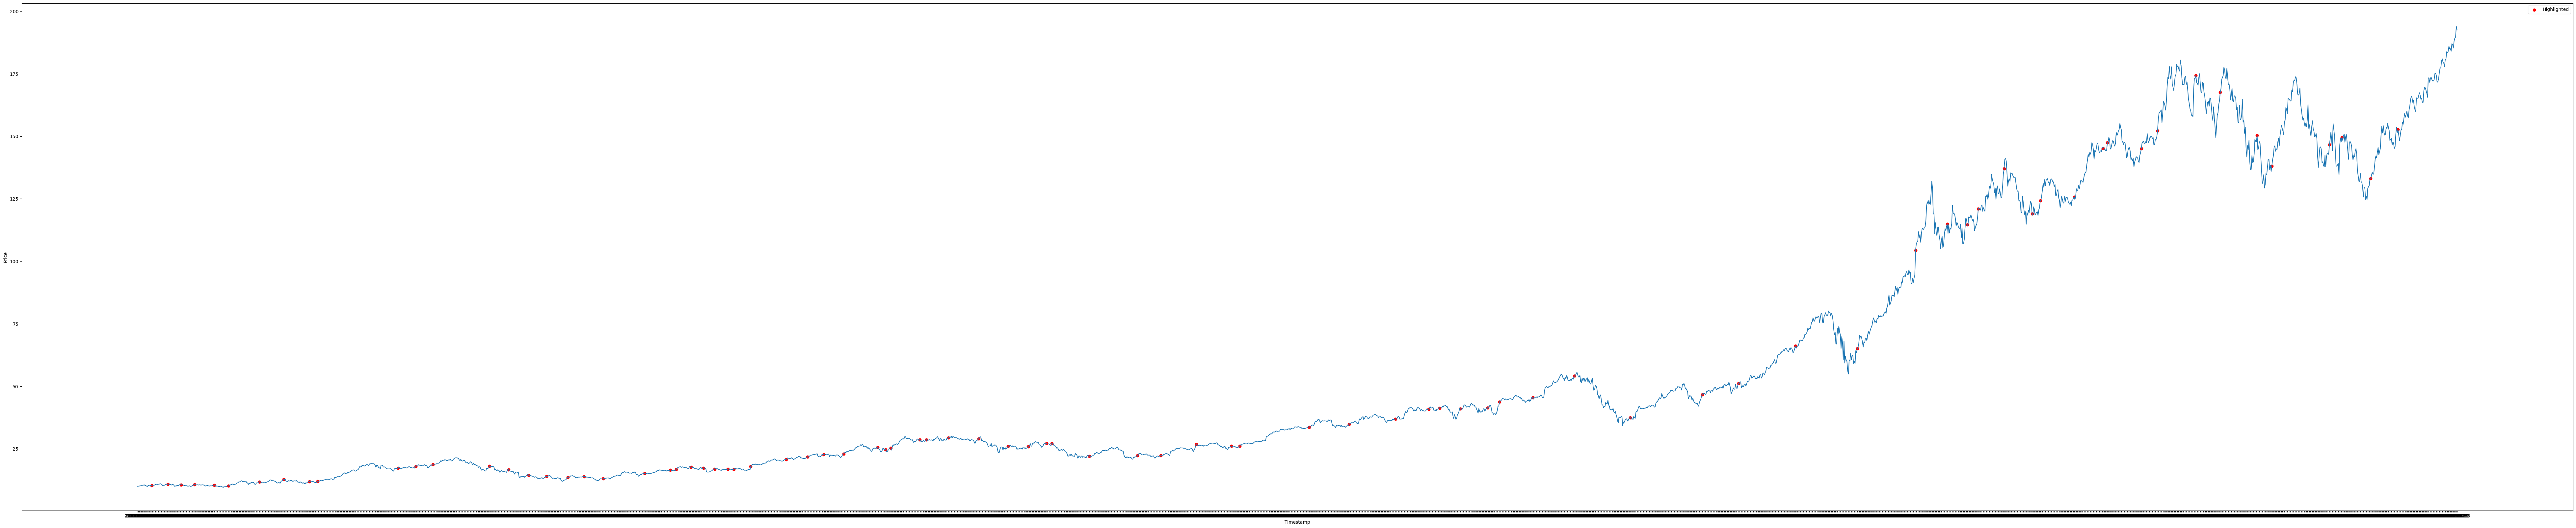

In [57]:
fig, ax = plt.subplots()
# plt.rc("font", family='NanumGothic')
x = 10000 / fig.dpi  # 가로 길이 (320 pixel)
y = 2000 / fig.dpi  # 세로 길이 (240 pixel)
fig.set_figwidth(x)
fig.set_figheight(y)
plt.plot(df.index, df['adjClose'])
plt.scatter(true_index, close_true, c='red', label='Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()

In [60]:
df

open      high       low     close    adjClose     volume  \
date                                                                        
2011-01-03   11.6300   11.7950   11.6013   11.7704   10.004130  444483228   
2011-01-04   11.8729   11.8750   11.7196   11.8318   10.056339  309325604   
2011-01-05   11.7696   11.9407   11.7679   11.9286   10.138598  255516772   
2011-01-06   11.9543   11.9732   11.8893   11.9189   10.130407  299779536   
2011-01-07   11.9282   12.0125   11.8536   12.0043   10.202958  311928848   
...              ...       ...       ...       ...         ...        ...   
2023-06-27  185.8900  188.3900  185.6700  188.0600  188.059998   50731499   
2023-06-28  187.9300  189.9000  187.6000  189.2500  189.250000   51216801   
2023-06-29  189.0800  190.0700  188.9400  189.5900  189.589996   46347308   
2023-06-30  191.6300  194.4800  191.2600  193.9700  193.970001   85068452   
2023-07-03  193.7800  193.8800  191.7600  192.4600  192.460007   31458460   

            unadjustedVolume  change  changePercent    vwap           label  \
date                                                                          
2011-01-03          15874401  0.1404        1.21000   11.74  January 03, 11   
2011-01-04          11047343 -0.0411       -0.34617   11.80  January 04, 11   
2011-01-05           9125599  0.1590        1.35000   11.88  January 05, 11   
2011-01-06          10706412 -0.0354       -0.29613   11.94  January 06, 11   
2011-01-07          11140316  0.0761        0.63798   11.94  January 07, 11   
...                      ...     ...            ...     ...             ...   
2023-06-27          50730800  2.1700        1.17000  187.50     June 27, 23   
2023-06-28          51216800  1.3200        0.70239  188.89     June 28, 23   
2023-06-29          46347300  0.5100        0.26973  189.56     June 29, 23   
2023-06-30          85069600  2.3400        1.22000  193.10     June 30, 23   
2023-07-03          30907450 -1.3200       -0.68118  192.66     July 03, 23   

            changeOverTime           5          20  
date                                                
2011-01-03        0.012100         NaN         NaN  
2011-01-04       -0.003462         NaN         NaN  
2011-01-05        0.013500         NaN         NaN  
2011-01-06       -0.002961         NaN         NaN  
2011-01-07        0.006380   10.106486         NaN  
...                    ...         ...         ...  
2023-06-27        0.011700  186.194000  182.584500  
2023-06-28        0.007024  187.251999  183.182000  
2023-06-29        0.002697  187.769998  183.799000  
2023-06-30        0.012200  189.228000  184.493000  
2023-07-03       -0.006812  190.666000  185.068501  

[3145 rows x 14 columns]

In [69]:
df['adjClose'].pct_change(periods=1).shift(-1)

date
2011-01-03    0.005219
2011-01-04    0.008180
2011-01-05   -0.000808
2011-01-06    0.007162
2011-01-07    0.018832
                ...   
2023-06-27    0.006328
2023-06-28    0.001797
2023-06-29    0.023103
2023-06-30   -0.007785
2023-07-03         NaN
Name: adjClose, Length: 3145, dtype: float64

In [25]:
close_true = df.loc[true_index, 'adjClose']

In [27]:
close_true.pct_change(periods=1)[1:]


date
2011-02-01    0.016827
2011-02-02   -0.002058
2011-02-03   -0.002556
2011-02-04    0.008910
2011-02-07    0.015527
                ...   
2023-06-27    0.015059
2023-06-28    0.006328
2023-06-29    0.001797
2023-06-30    0.023103
2023-07-03   -0.007785
Name: adjClose, Length: 1958, dtype: float64

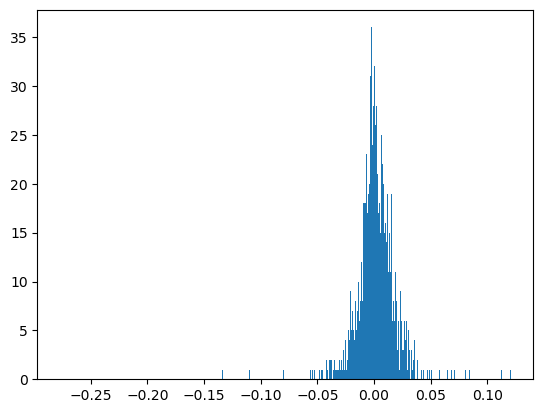

In [40]:
plt.hist(close_true.pct_change(periods=1)[1:], bins=1000)
plt.show()

In [37]:
np.mean(close_true.pct_change(periods=1)[1:]), np.std(close_true.pct_change(periods=1)[1:]), len(close_true.pct_change(periods=1)[1:])

(0.0016913023704790502, 0.019405835092729872, 1958)

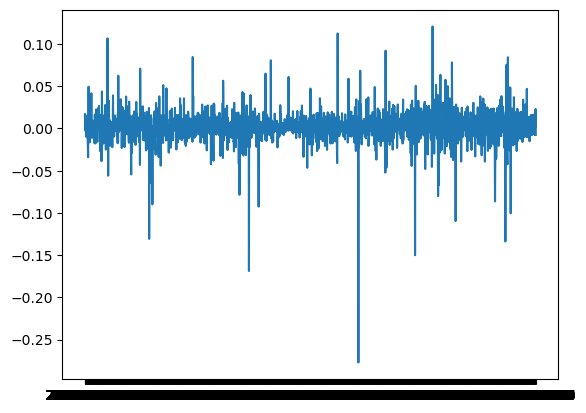

In [42]:
plt.plot(close_true.pct_change(periods=1)[1:])

In [38]:
np.mean(df['adjClose'].pct_change(periods=1)[1:]), np.std(df['adjClose'].pct_change(periods=1)[1:]), len(df['adjClose'].pct_change(periods=1)[1:])

(0.001103554769136629, 0.018025557045271586, 3144)

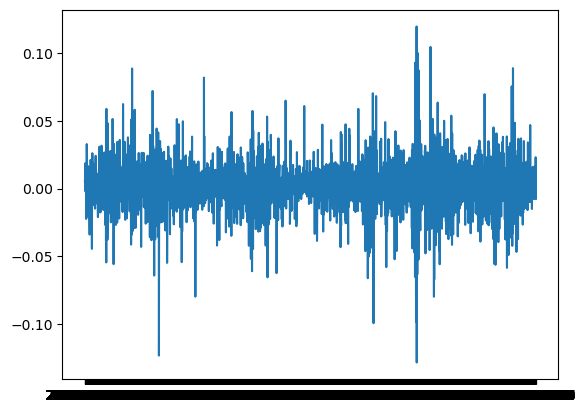

In [41]:
plt.plot(df['adjClose'].pct_change(periods=1)[1:])

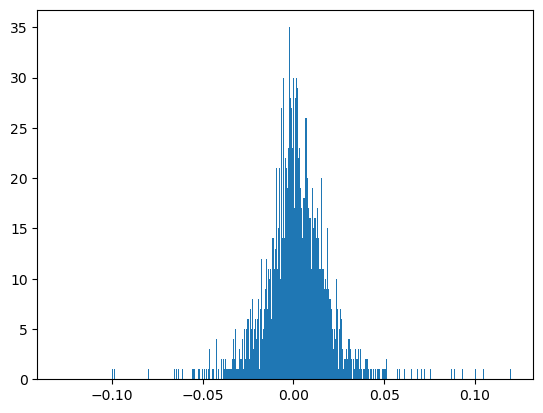

In [39]:
plt.hist(df['adjClose'].pct_change(periods=1)[1:], bins=1000)
plt.show()

In [224]:
df = pd.read_csv('/home/fengai/Data/snp500/1d/AAPL.csv', index_col= 0).iloc[::-1]
def hist_ma_c1(df, m1, m2):

    df[m1] = df['adjClose'].rolling(window=m1).mean()


    df[m2] = df['adjClose'].rolling(window=m2).mean()
    true_index = []
    flag = False
    # print(df)
    for ii in df.index:
        if  df.loc[ii, m1] > df.loc[ii, m2] and flag == False:
            true_index.append(ii)
            flag = True
        elif df.loc[ii, m1] <= df.loc[ii, m2] :
            flag = False

    # ma = df['adjClose'].rolling(window=NN).mean()
    # true_index = df_buy[df_buy == True].index
    # close_true = df.loc[true_index, 'adjClose']
    # rate_ma = close_true.pct_change(periods=1)[1:]
    # rate = df['adjClose'].pct_change(periods=1)[1:]

    rates = df['adjClose'].pct_change(periods=1).shift(-1)

    # print(rates)
    # print(true_index)
    rates_true = rates.loc[true_index]
    rates_true = rates_true.dropna()

    rates = rates.dropna()
    # print(rates_true)
    # print(rates)
    # plt.hist(rates_true, bins=100)
    # plt.show()
    return [list(rates_true), list(rates)]
    # return rates_true
# hist_ma(df, 5, 20)

In [225]:
a1, a2 = hist_ma_c1(df, 5, 20)
np.mean(a1), np.mean(a2)

(0.0005535095600776369, 0.001103554769136629)

In [94]:
sym_list = os.listdir('/home/fengai/Data/snp500/1d')

In [181]:
rates_true_all = []
rates_all = []
for ii in sym_list[:]:
    df = pd.read_csv(f'/home/fengai/Data/snp500/1d/{ii}', index_col= 0)
    rates_true_all = rates_true_all + hist_ma(df, 5, 20)[0]
    rates_all = rates_all +  hist_ma(df, 5, 20)[1]
    # print(hist_ma(df, 5, 20))

In [190]:
len(rates_true_all), len(rates_all)

(47429, 1527033)

In [194]:
aa = random.sample(rates_all, 47429)

In [195]:
aa

[-0.004352791974947423,
 0.0026901590025456557,
 0.032970321543559944,
 0.01590667169073612,
 -0.00910476126231452,
 -0.002468382018501525,
 -0.0002944297203741897,
 -0.04282301745551653,
 0.010834323977804594,
 -0.0021151210783824093,
 0.00012069644952283909,
 0.0027165524701373567,
 -0.005970066459343615,
 0.009505535452460245,
 -0.002313617003280699,
 -0.010850176170301484,
 -0.012192659427127772,
 -0.009108974302852402,
 -0.007235015127057265,
 0.005076102886524714,
 -0.014308653630645707,
 -0.017877681660899758,
 0.008462796342168843,
 0.010600496433296192,
 -0.0021922225969646103,
 -0.011893852711081787,
 0.005855637022692761,
 -0.001645877067674384,
 0.010882183753722297,
 -0.032238078180948926,
 -0.013024447448154786,
 -0.004396653856641675,
 0.015313807720384043,
 0.004303016392028125,
 0.0025421255796220787,
 0.005128956530466855,
 0.00475509225586479,
 0.008203269884909048,
 0.0017780637944182498,
 0.001012337667141816,
 -0.006100807032713651,
 -0.02558570686678574,
 0.01399

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 1.000e+01, 5.000e+00,
        9.000e+00, 9.000e+00, 7.000e+00, 4.000e+00, 1.000e+01, 5.000e+00,
        6.000e+00, 1.500e+01, 1.400e+01, 2.500e+01, 3.000e+01, 3.400e+01,
        4.700e+01, 4.800e+01, 7.200e+01, 8.600e+01, 1.170e+02, 1.580e+02,
        2.000e+02, 2.870e+02, 4.240e+02, 6.460e+02, 8.610e+02, 1.268e+03,
        2.017e+03, 3.044e+03, 4.448e+03, 5.743e+03, 6.631e+03, 5.933e+03,
        4.499e+03, 3.201e+03, 2.134e+03, 1.484e+03, 1.039e+03, 6.960e+02,
        5.260e+02, 3.700e+02, 2.650e+02, 2.000e+02, 1.300e+02, 1.270e+02,
        8.500e+01, 6.400e+01, 5.600e+01, 5.100e+01, 3.400e+01, 2.700e+01,
        3.600e+01, 1.300e+01, 2.300e+0

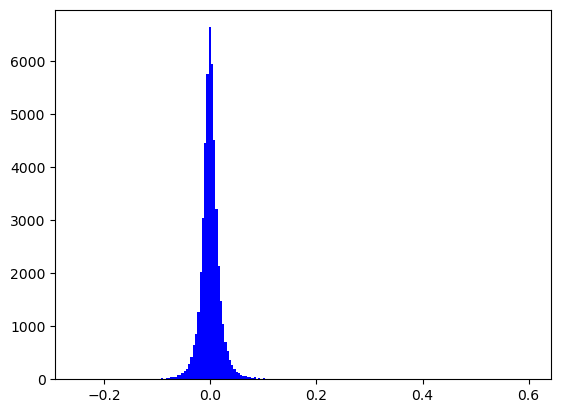

In [196]:
plt.hist(aa, bins=200, color='b')

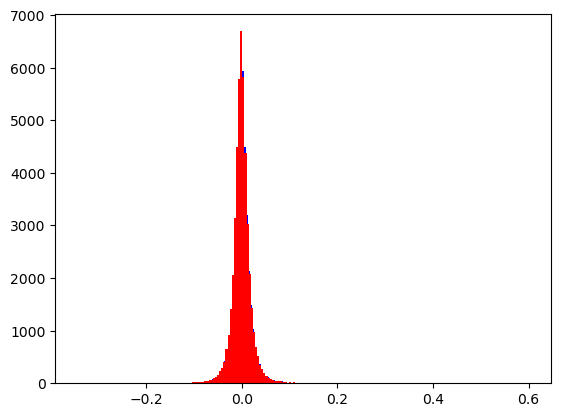

In [201]:
# plt.hist(rates_all, bins=200, color='b')
plt.hist(aa, bins=200, color='b')
plt.hist(rates_true_all, bins=200, color='r')
plt.show()

(array([1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 4.00000e+00, 9.00000e+00, 8.00000e+00, 1.40000e+01,
        1.80000e+01, 2.30000e+01, 5.30000e+01, 7.70000e+01, 1.47000e+02,
        3.04000e+02, 5.36000e+02, 9.77000e+02, 1.86300e+03, 4.60400e+03,
        1.33380e+04, 5.41040e+04, 2.91956e+05, 7.83013e+05, 2.84436e+05,
        6.25490e+04, 1.70900e+04, 5.81200e+03, 2.62800e+03, 1.27600e+03,
        6.88000e+02, 4.36000e+02, 3.03000e+02, 1.91000e+02, 1.54000e+02,
        8.20000e+01, 7.40000e+01, 4.70000e+01, 4.00000e+01, 2.50000e+01,
        2.20000e+01, 2.40000e+01, 1.50000e+01, 1.70000e+01, 1.30000e+01,
        1.10000e+01, 6.00000e+00, 5.00000e+00, 2.00000e+00, 4.00000e+00,
        4.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00,
        2.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00

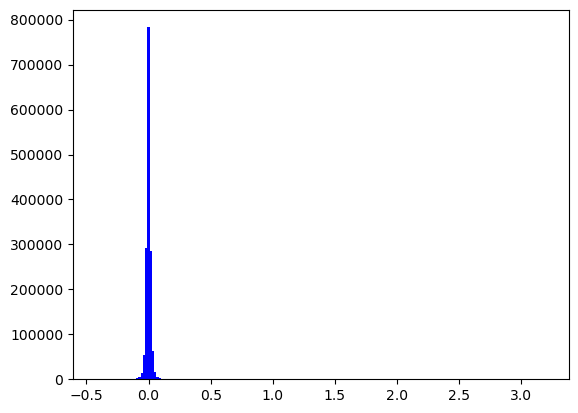

In [187]:
plt.hist(rates_all, bins=200, color='b')

In [198]:
np.mean(aa), np.std(aa)

(-0.00028627612932328393, 0.02056599844220579)

In [185]:
np.mean(rates_all), np.std(rates_all)

(-0.00027449102003689735, 0.020591082074580814)

In [184]:
np.mean(rates_true_all), np.std(rates_true_all)

(-0.0007976549924889996, 0.022090190996285113)

In [231]:
df = pd.read_csv('/home/fengai/Data/snp500/1d/AAPL.csv', index_col= 0).iloc[::-1]
def hist_ma(df, m1, m2, chng):

    df[m1] = df['adjClose'].rolling(window=m1).mean()


    df[m2] = df['adjClose'].rolling(window=m2).mean()
    true_index = []
    flag = False
    # print(df)
    for ii in df.index:
        if  df.loc[ii, m1] > df.loc[ii, m2] and flag == False:
            true_index.append(ii)
            flag = True
        elif df.loc[ii, m1] <= df.loc[ii, m2] :
            flag = False

    # ma = df['adjClose'].rolling(window=NN).mean()
    # true_index = df_buy[df_buy == True].index
    # close_true = df.loc[true_index, 'adjClose']
    # rate_ma = close_true.pct_change(periods=1)[1:]
    # rate = df['adjClose'].pct_change(periods=1)[1:]

    rates = df['adjClose'].pct_change(periods=chng).shift(-chng)

    # print(rates)
    # print(true_index)
    rates_true = rates.loc[true_index]
    rates_true = rates_true.dropna()

    rates = rates.dropna()
    # print(rates_true)
    # print(rates)
    # plt.hist(rates_true, bins=100)
    # plt.show()
    return [list(rates_true), list(rates)]
    # return rates_true
# hist_ma(df, 5, 20)

In [ ]:
df = pd.read_csv('/home/fengai/Data/snp500/1d/AAPL.csv', index_col= 0).iloc[::-1]
def hist_ma_c1(df, m1, m2):

    df[m1] = df['adjClose'].rolling(window=m1).mean()


    df[m2] = df['adjClose'].rolling(window=m2).mean()
    true_index = []
    flag = False
    # print(df)
    for ii in df.index:
        if  df.loc[ii, m1] > df.loc[ii, m2] and flag == False:
            true_index.append(ii)
            flag = True
        elif df.loc[ii, m1] <= df.loc[ii, m2] :
            flag = False

    # ma = df['adjClose'].rolling(window=NN).mean()
    # true_index = df_buy[df_buy == True].index
    # close_true = df.loc[true_index, 'adjClose']
    # rate_ma = close_true.pct_change(periods=1)[1:]
    # rate = df['adjClose'].pct_change(periods=1)[1:]

    rates = df['adjClose'].pct_change(periods=1).shift(-1)

    # print(rates)
    # print(true_index)
    rates_true = rates.loc[true_index]
    rates_true = rates_true.dropna()

    rates = rates.dropna()
    # print(rates_true)
    # print(rates)
    # plt.hist(rates_true, bins=100)
    # plt.show()
    return [list(rates_true), list(rates)]
    # return rates_true
# hist_ma(df, 5, 20)

In [234]:
c1, c2 = hist_ma_c1(df, 5, 20)
np.mean(c1), np.mean(c2)

(0.0005535095600776369, 0.001103554769136629)

In [232]:
b1, b2 = hist_ma(df, 5, 20, 5)

In [230]:
c1, c2 = hist_ma(df, 5, 20, 1)
np.mean(c1), np.mean(c2)

(0.0005535095600776369, 0.001103554769136629)

In [218]:
len(b1), len(b2)

(85, 3140)

In [235]:
np.mean(a1), np.mean(a2)

(0.0005535095600776369, 0.001103554769136629)

In [233]:
np.mean(b1), np.mean(b2)

(0.004905564797800557, 0.005422589467136968)

In [236]:
rates_true_all = []
rates_all = []
for ii in sym_list[:]:
    df = pd.read_csv(f'/home/fengai/Data/snp500/1d/{ii}', index_col= 0)
    rates_true_all = rates_true_all + hist_ma(df, 5, 20, 5)[0]
    rates_all = rates_all +  hist_ma(df, 5, 20, 5)[1]
    # print(hist_ma(df, 5, 20))

In [237]:
len(rates_true_all)

47386

In [299]:
r1 = random.sample(rates_all, len(rates_true_all))

In [247]:
np.mean(r1), np.mean(rates_true_all)

(-0.0009960661423190414, -0.0019501618640389005)

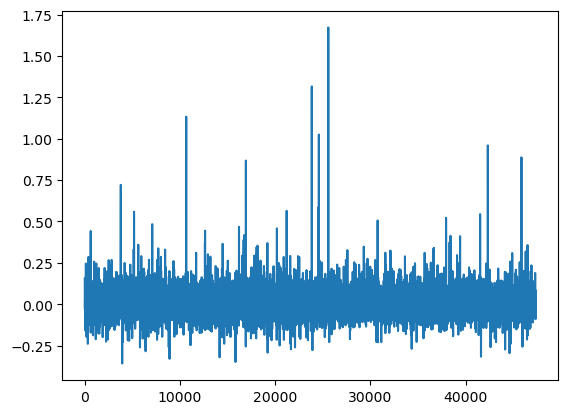

In [239]:
plt.plot(r1)

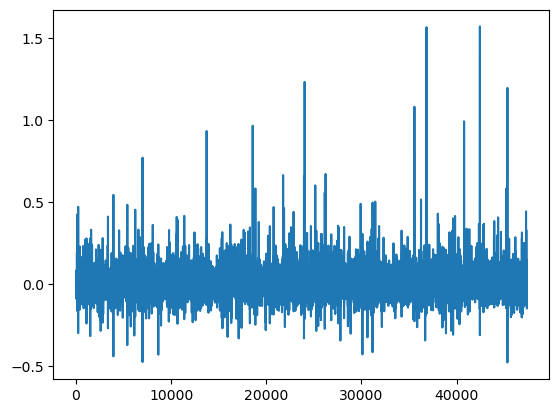

In [240]:
plt.plot(rates_true_all)

(array([2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 5.0000e+00, 9.0000e+00, 5.0000e+00,
        1.4000e+01, 1.3000e+01, 2.0000e+01, 3.6000e+01, 5.2000e+01,
        9.5000e+01, 1.5900e+02, 2.9500e+02, 5.3100e+02, 1.1280e+03,
        2.5300e+03, 6.2060e+03, 1.1517e+04, 1.1873e+04, 6.5610e+03,
        3.0770e+03, 1.4160e+03, 7.0400e+02, 3.7500e+02, 2.3000e+02,
        1.4500e+02, 8.6000e+01, 6.4000e+01, 5.6000e+01, 4.2000e+01,
        2.7000e+01, 9.0000e+00, 1.4000e+01, 1.4000e+01, 1.3000e+01,
        1.0000e+01, 6.0000e+00, 4.0000e+00, 5.0000e+00, 4.0000e+00,
        2.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

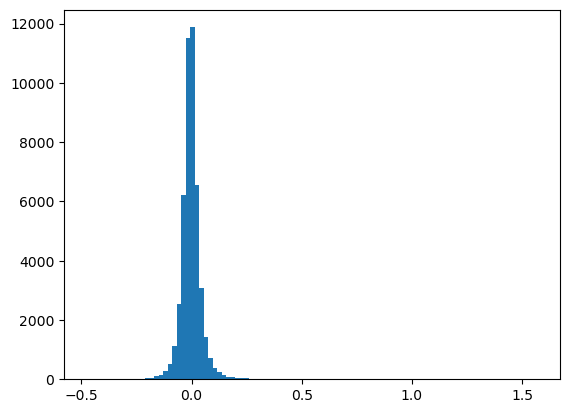

In [244]:
plt.hist(rates_true_all, bins=100)

(array([2.0000e+00, 2.0000e+00, 1.0000e+00, 4.0000e+00, 7.0000e+00,
        1.0000e+01, 1.3000e+01, 2.7000e+01, 2.1000e+01, 5.6000e+01,
        1.1100e+02, 1.7100e+02, 3.6400e+02, 7.2900e+02, 1.8000e+03,
        4.5030e+03, 9.8520e+03, 1.2813e+04, 8.5790e+03, 4.0750e+03,
        1.9180e+03, 9.6100e+02, 5.1900e+02, 2.7600e+02, 1.8900e+02,
        1.3200e+02, 6.3000e+01, 5.1000e+01, 3.7000e+01, 2.3000e+01,
        1.5000e+01, 9.0000e+00, 1.0000e+01, 7.0000e+00, 5.0000e+00,
        5.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

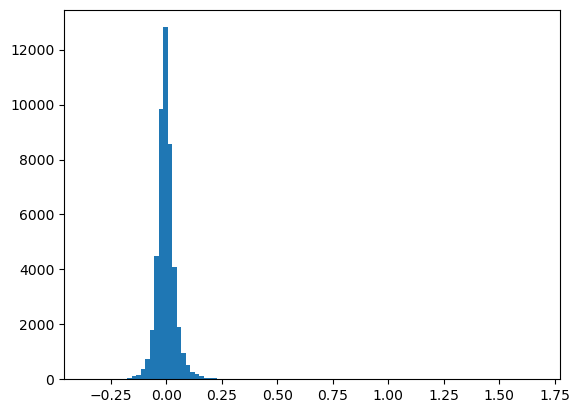

In [246]:
plt.hist(r1, bins=100)

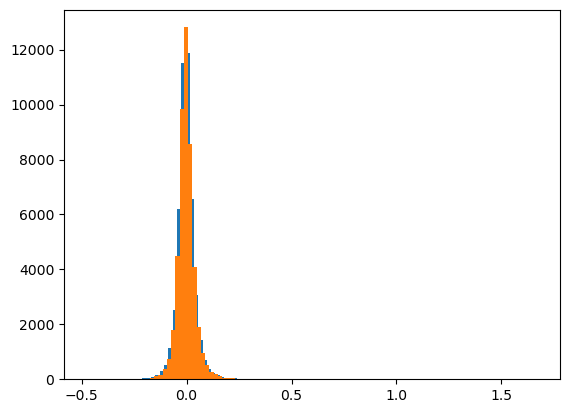

In [248]:
plt.hist(rates_true_all, bins=100)
plt.hist(r1, bins=100)
plt.show()

In [272]:
x3 = np.random.normal(0, 1, 47386)
x3

array([-0.70586362,  0.27898819, -0.7033239 , ..., -0.92148703,
        0.02181163,  1.05263844])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 4.000e+00, 9.000e+00, 6.000e+00, 5.000e+00, 1.500e+01,
        1.600e+01, 1.600e+01, 1.500e+01, 3.300e+01, 4.500e+01, 5.700e+01,
        5.600e+01, 7.100e+01, 1.020e+02, 1.150e+02, 1.480e+02, 1.830e+02,
        1.690e+02, 2.110e+02, 2.860e+02, 3.170e+02, 3.610e+02, 4.210e+02,
        4.860e+02, 5.280e+02, 5.780e+02, 7.030e+02, 7.030e+02, 8.800e+02,
        9.160e+02, 1.013e+03, 1.076e+03, 1.215e+03, 1.241e+03, 1.295e+03,
        1.371e+03, 1.417e+03, 1.503e+03, 1.466e+03, 1.576e+03, 1.562e+03,
        1.516e+03, 1.533e+03, 1.629e+03, 1.660e+03, 1.513e+03, 1.500e+03,
        1.441e+03, 1.378e+03, 1.352e+03, 1.235e+03, 1.140e+03, 1.063e+03,
        1.012e+03, 8.470e+02, 8.230e+02, 7.460e+02, 6.740e+02, 5.850e+02,
        5.110e+02, 4.820e+02, 3.740e+02, 3.760e+02, 3.070e+02, 2.500e+02,
        2.310e+02, 1.960e+02, 1.480e+02, 1.500e+02, 1.160e+02, 8.600e+01,
        6.600e+01, 6.000e+01, 3.300e+0

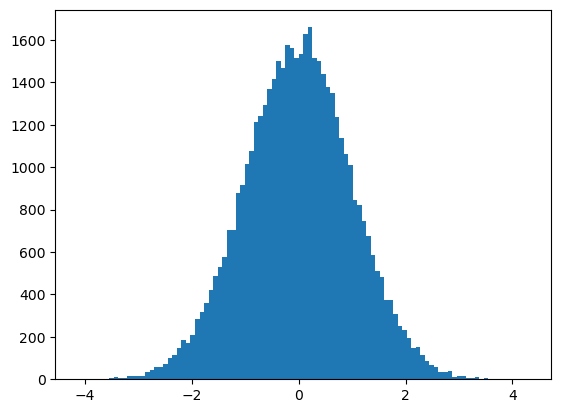

In [261]:
plt.hist(x3, bins=100)

In [268]:
# t-test 가설 충적 여부 검정
# https://rfriend.tistory.com/754
import scipy.stats as stats
x1, x2 = np.array(r1), np.array(rates_true_all)
t_stat_x1, p_val_x1 = stats.kstest(x1, 'norm', args=(x1.mean(), x1.var()**0.5))
t_stat_x2, p_val_x2 = stats.kstest(x2, 'norm', args=(x2.mean(), x2.var()**0.5))
t_stat_x3, p_val_x3 = stats.kstest(x2, 'norm', args=(x3.mean(), x3.var()**0.5))
print('[x1]  t-statistics:', t_stat_x1, '  p-value:', p_val_x1)
print('[x2]  t-statistics:', t_stat_x2, '  p-value:', p_val_x2)
print('[x2]  t-statistics:', t_stat_x3, '  p-value:', p_val_x3)

[x1]  t-statistics: 0.09607040908594344   p-value: 0.0
[x2]  t-statistics: 0.10327991988783591   p-value: 0.0
[x2]  t-statistics: 0.44443415280228094   p-value: 0.0


In [273]:
t_stat_x3, p_val_x3 = stats.kstest(x2, 'norm')
t_stat_x3, p_val_x3

(0.4423412554671423, 0.0)

In [276]:
t, p = stats.kstest(rates_true_all, rates_all)
t, p

(0.009418516053066303, 0.0005716528223551614)

In [267]:
sha = stats.shapiro(x3)
sha

ShapiroResult(statistic=0.9999595284461975, pvalue=0.8207548260688782)

In [284]:
x4 = np.random.normal(0, 1, 47386)


In [285]:
t, p = stats.kstest(x3, x4)
t, p

(0.0057822985691976525, 0.4051033181852879)

In [293]:
from scipy.stats import chisquare as chi

In [291]:
x1

array([-0.01894076,  0.15885472,  0.00781284, ...,  0.00619159,
       -0.04035264,  0.00557105])

In [294]:
chi_result = chi(x1, x2)
print(chi_result)

Power_divergenceResult(statistic=nan, pvalue=nan)


/home/fengai/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7412: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/home/fengai/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7412: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [295]:
np.cov(x1, x2)

array([[2.15486572e-03, 4.25359745e-07],
       [4.25359745e-07, 2.51093634e-03]])

In [300]:
np.corrcoef(r1, x2)

array([[ 1.        , -0.00727928],
       [-0.00727928,  1.        ]])

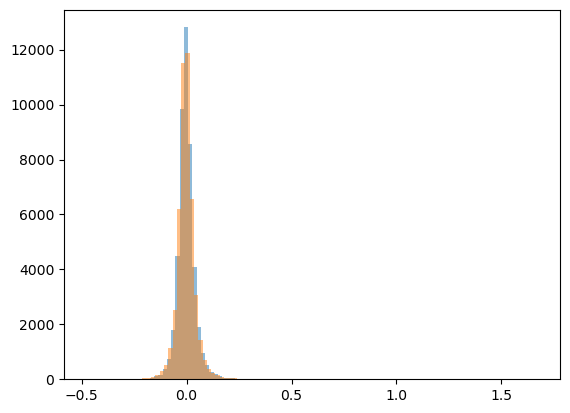

In [303]:
plt.hist(x1, alpha=0.5, bins=100)
plt.hist(x2, alpha=0.5, bins=100)
plt.show()

In [305]:
x1.mean(), x2.mean()

(-0.0009960661423190414, -0.0019501618640389005)

In [307]:
stats.kstest(x1,x2)

KstestResult(statistic=0.011332461064449434, pvalue=0.004516326836856572, statistic_location=-0.034451136728763876, statistic_sign=-1)

In [311]:
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=3.0405616830719957, pvalue=0.0023620176039444597)

In [328]:
xx = random.sample(list(x1), 40)

In [329]:
stats.kstest(xx , 'norm')

KstestResult(statistic=0.47112952944848463, pvalue=1.1447841675505405e-08, statistic_location=0.07243081935875062, statistic_sign=1)

In [330]:
stats.shapiro(xx)

ShapiroResult(statistic=0.9840805530548096, pvalue=0.8351705074310303)

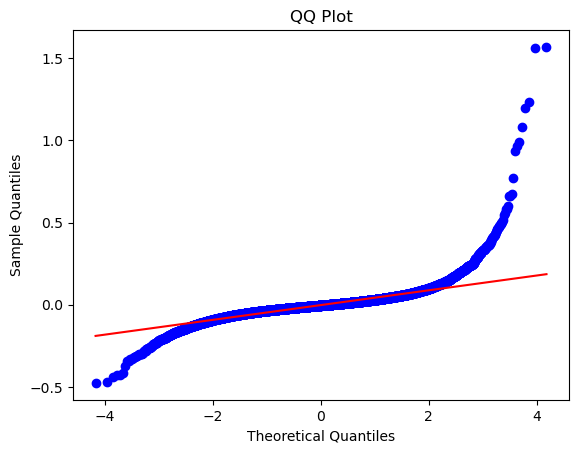

In [334]:
stats.probplot(x2, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [335]:
d1, d2 = hist_ma_c1(df, 2, 20)
np.mean(d1), np.mean(d2)

(0.00040859775210916826, 0.000324329879977431)

In [341]:
rates_true_all = []
rates_all = []
for ii in sym_list[100:150]:
    df = pd.read_csv(f'/home/fengai/Data/snp500/1d/{ii}', index_col= 0)
    rates_true_all = rates_true_all + hist_ma(df, 10, 3, 3)[0]
    rates_all = rates_all +  hist_ma(df, 10, 3, 3)[1]
    # print(hist_ma(df, 5, 20))

In [337]:
len(rates_true_all), len(rates_all)

(6849, 153573)

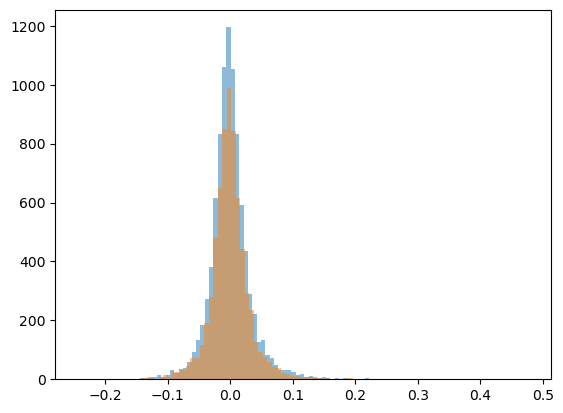

In [342]:
plt.hist(rates_true_all, alpha=0.5, bins=100)
plt.hist(random.sample(rates_all, 6849), alpha=0.5, bins=100)
plt.show()

In [343]:
np.mean(rates_true_all), np.mean(rates_all)

(-0.0005067508515820134, -0.0010152616451123313)